# Let's talk about DataFrames (100 Points)
In DATA 542 we learn much about DataFrames. What is the real advantage of DataFrames? In this lab, you will explore a bit by analyzing data, using the concepts learned in lectures 2 and 3. 

## Dataset
There are three datasets:
1. Bison-observation-2002.csv
2. Bison-dataset2.csv
3. NPSpecies_ABLI.xlsx


## Part I (25 Points)
The first dataset (Bison-observation-2002.csv) contains parts of the observation of Bisons in Wood Buffalo National Park in 2002. 
For the following questions, use **Python only (not Pandas)** to read the dataset and do the analytics.
1. What is the sum of the Bisons observed in the dataset? (10 points)
2. How many different types of Bisons are observed in the 'Sub Population' column? (10 points)

**Provide your code and answer** in the following.

In [1]:
# code
def parse_csv(file_lines):
    total_bison_count = 0
    sub_population_types = set()

    for line in file_lines[2:]:  
        columns = line.strip().split(',')
        if len(columns) > 8 and columns[7].isdigit():  
            total_bison_count += int(columns[7])
        if len(columns) > 1:
            sub_population_types.add(columns[1])

    return total_bison_count, len(sub_population_types)




with open("Bison-observation-2002.csv", 'r', encoding='utf-8') as file:
    lines = file.readlines()

    total_bison, unique_sub_populations = parse_csv(lines)
total_bison, unique_sub_populations

(1560, 5)

## Part II (25 Points)
Use the same dataset in Part I and answer the following questions using DataFrames:
3. What is the sum of the Bisons observed in the dataset? (10 points)
4. How many different types of Bisons are observed in the 'Sub Population' column? (10 points)

**Provide your code and answer** in the following.

In [2]:
# code
import pandas as pd

df = pd.read_csv("Bison-observation-2002.csv")


df['Count'] = pd.to_numeric(df['Count'], errors='coerce')

total_bison_sum_corrected = df['Count'].sum()


unique_sub_population = df[df['Sub Population'] != "Sous-population"]['Sub Population'].unique()

unique_sub_population_count_corrected = len(unique_sub_population)


total_bison_sum_corrected, unique_sub_population_count_corrected

(1560.0, 5)

## Part III (25 points)
In this section, we will use the visualization packages to explore the missing values. 

Use the missingno package to explore the percentage of missing values in Bison-dataset2.csv dataset. 

5. What columns can be imputed with other values based on your observations? (10 points)
6. Which columns should be omitted? (10 points)
7. For the columns you find that can be imputed, write code to replace the null values. (10 points)

**Provide your code and answer** in the following.

In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [5]:
# code
import missingno as msno
import matplotlib.pyplot as plt
df = pd.read_csv("Bison-dataset2.csv")


df.head()


,Obervation Record Identification,Raw Identification,Study Identification,Transect Identification,Stratum Code,Sub Population,Date,Time,Longitude Raw,Latitude Raw,...,Direction,Distance,Sampling,On/Off the Transect,Photos,Canopy Cover,Vegetation,Notes,Notes Data,Raw Data
0,Identification de líobservation,Identification brute,Identification de líÈtude,Identification du transect,Code de strate†,Sous-population,Date,Heure†,Longitude brute,Latitude brute,...,Direction†,Distance†,…chantillonnage†,Sur/Hors du transect,Photographies†,Couvert forestier,VÈgÈtation†,Remarques†,DonnÈes sur les remarques,DonnÈes brutes
1,NaN,NaN,BisonTC2014,AthBirchRecon,Athabasca Birch Recon,Delta,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,OFF,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,BisonTC2014,ClaireE30,Claire East,Delta,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,OFF,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,BisonTC2014,ClaireE30,Claire East,Delta,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ON,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,BisonTC2014,DeltaPine154,Delta Pine,Delta,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ON,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

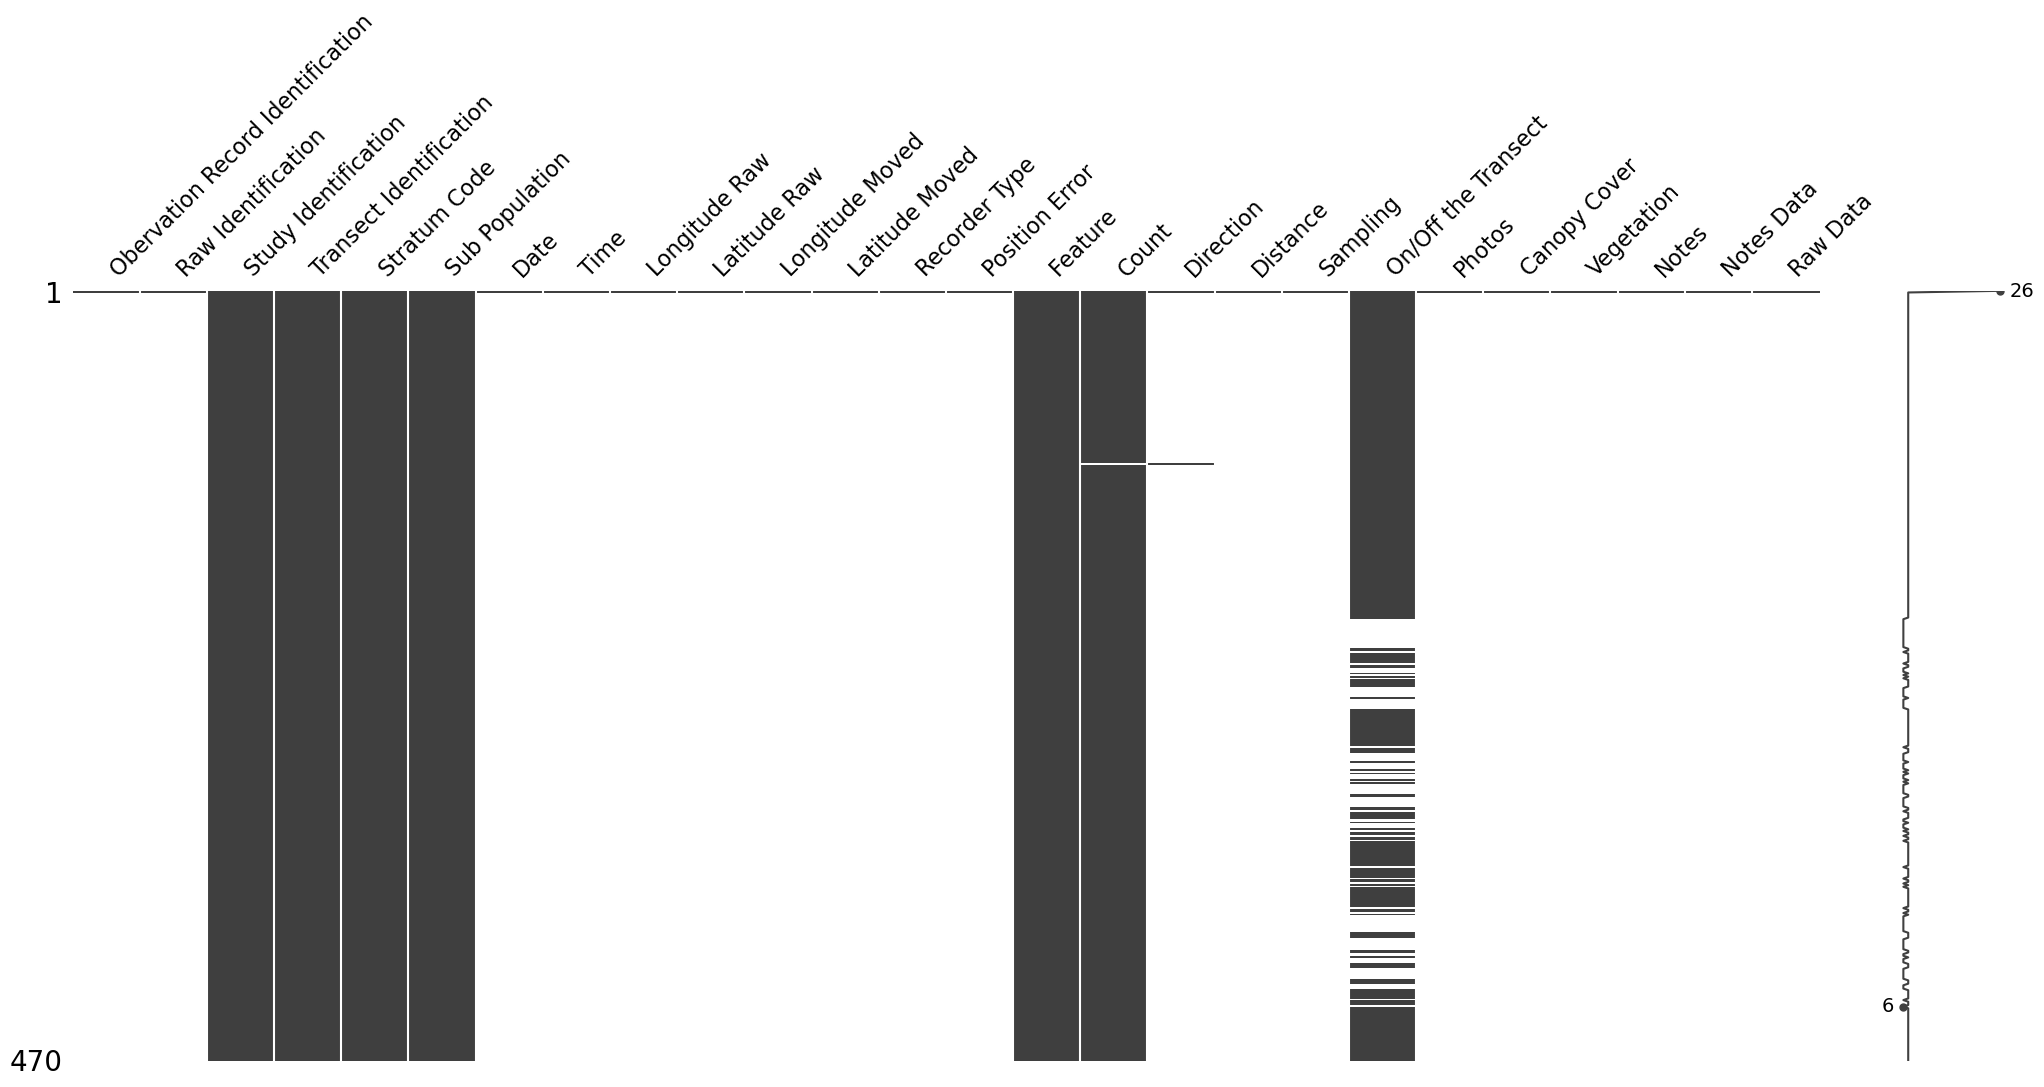

In [6]:
msno.matrix(df)

In [7]:
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')
mean_count = df['Count'].mean()
df['Count'].fillna(mean_count, inplace=True)


mode_value = df['On/Off the Transect'].mode()[0]
df['On/Off the Transect'].fillna(mode_value, inplace=True)

<Axes: >

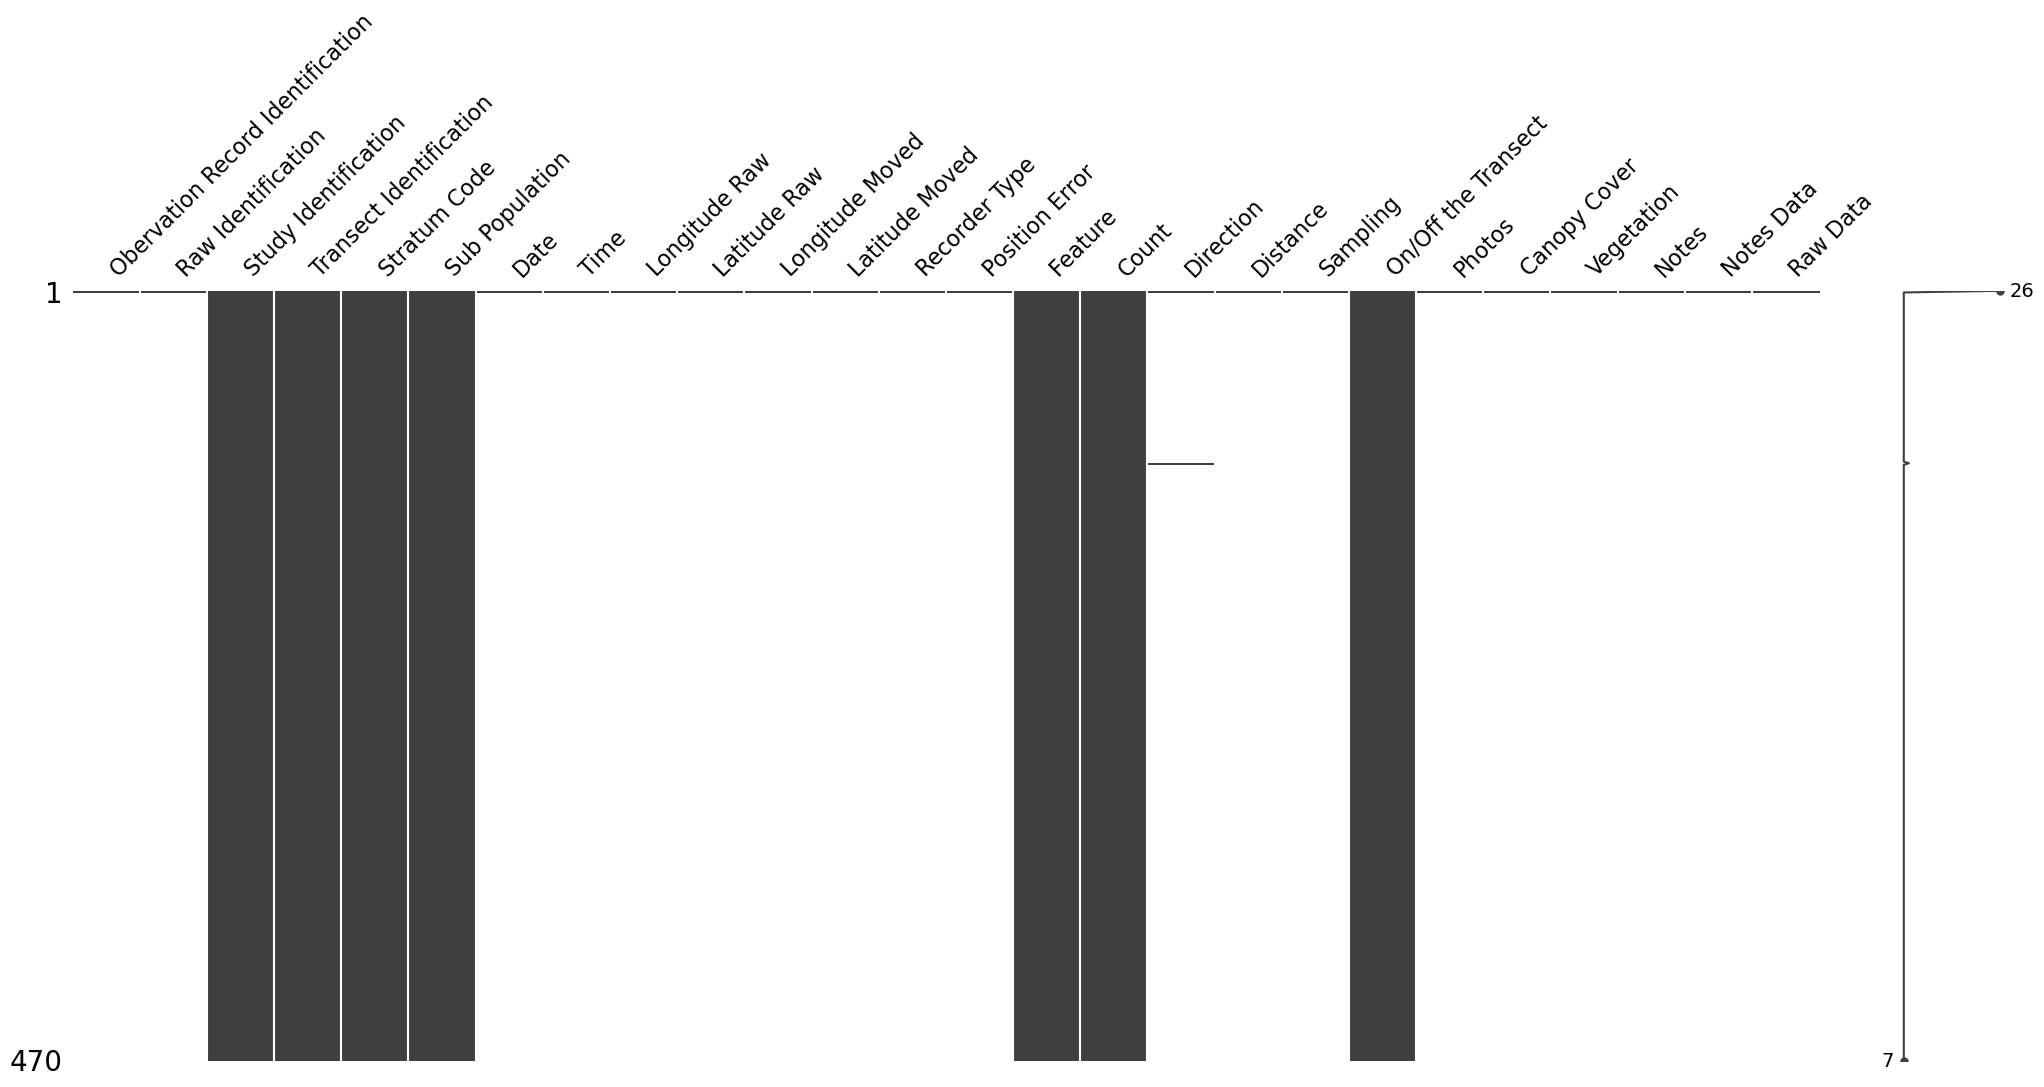

In [8]:
msno.matrix(df)

## Part IV (25 points)
Load the third dataset NPSpecies_ABLI.xlsx in Pandas. 

Note: You may receive an error that mentions you need to install another library. 

8. How many different categories are there in the 'Category' column? (10 points)
9. How many data records are there in each of the categories you extracted in question 8? (10 points)
10. Which data records have value 'Inactive' for 'Taxon Record Status' column? (10 points)

In [9]:
# code
file_path = 'NPSpecies_ABLI.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')
num_unique_categories = df['Category'].nunique()
print(num_unique_categories)
category_counts = df['Category'].value_counts()
print(category_counts)
inactive_records = df[df['Taxon Record Status'] == 'Inactive']

print(inactive_records)

3
Bird      131
Mammal     38
Fish       10
Name: Category, dtype: int64
    Park Code                                          Park Name Category  \
16       ABLI  Abraham Lincoln Birthplace National Historical...   Mammal   
112      ABLI  Abraham Lincoln Birthplace National Historical...     Bird   
119      ABLI  Abraham Lincoln Birthplace National Historical...     Bird   

     Category Sort          Order            Family  Taxon Code     TSN  \
16               1     Chiroptera  Vespertilionidae      695948 -756551   
112              2  Passeriformes         Parulidae      168055 -505796   
119              2  Passeriformes         Parulidae      168057 -505797   

    Taxon Record Status         Scientific Name         Common Names  \
16             Inactive    Perimyotis subflavus      tri-colored bat   
112            Inactive  Helmitheros vermivorum  worm-eating warbler   
119            Inactive     Seiurus aurocapilla             ovenbird   

                   Synonyms 